# Open Exploration

## Imports

In [1]:
# Standard Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import networkx as nx
import scipy as sp

# Workbench Imports
from ema_workbench import (Model, Policy, MultiprocessingEvaluator, ScalarOutcome, RealParameter, IntegerParameter, CategoricalParameter, optimize, Scenario, Constant, ema_logging,perform_experiments, SequentialEvaluator)
from ema_workbench.em_framework.optimization import EpsilonProgress, HyperVolume
from ema_workbench.util import ema_logging, save_results, load_results
from ema_workbench.em_framework.samplers import sample_levers, sample_uncertainties
from ema_workbench.em_framework.evaluators import LHS, SOBOL, MORRIS, SequentialEvaluator, BaseEvaluator


ema_logging.log_to_stderr(ema_logging.INFO)


<Logger EMA (DEBUG)>

## Model Specification

In [2]:
# Model Imports
from dike_model_function import DikeNetwork
from problem_formulation import get_model_for_problem_formulation

dike_model, time_step = get_model_for_problem_formulation(8)

We specify a reference policy, where no measures are implemented to assess the impacts of such inaction. 

In [3]:
policy_noaction = Policy("NoAction",  
                    **{'0_RfR 0': 0, '0_RfR 1' : 0, '0_RfR 2' : 0,
                    '1_RfR 0': 0, '1_RfR 1' : 0, '1_RfR 2' : 0,
                    '2_RfR 0': 0, '2_RfR 1' : 0, '2_RfR 2' : 0,
                    '3_RfR 0': 0, '3_RfR 1' : 0, '3_RfR 2' : 0,
                    '4_RfR 0': 0, '4_RfR 1' : 0, '4_RfR 2' : 0,
                    'A.1_DikeIncrease 0' : 0, 'A.1_DikeIncrease 1' : 0, 'A.1_DikeIncrease 2' : 0,
                    'A.2_DikeIncrease 0' : 0, 'A.2_DikeIncrease 1' : 0, 'A.2_DikeIncrease 2' : 0,
                    'A.3_DikeIncrease 0' : 0, 'A.3_DikeIncrease 1' : 0, 'A.3_DikeIncrease 2' : 0,
                    'A.4_DikeIncrease 0' : 0, 'A.4_DikeIncrease 1' : 0, 'A.4_DikeIncrease 2' : 0,
                    'A.5_DikeIncrease 0' : 0, 'A.5_DikeIncrease 1' : 0, 'A.5_DikeIncrease 2' : 0,
                    'EWS_DaysToThreat':  0   })



The reference case to be used for the problem formulations of Gelderland, Overijssel and the Holistic view will all be from the same run. This will ensure that they are optimising based on the same reference scenario and theoretically the same base.

In [ ]:
n_scenarios = 10000

ema_logging.log_to_stderr(ema_logging.INFO)
 
with MultiprocessingEvaluator(dike_model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=n_scenarios, policies=policy_noaction)

In [ ]:
#Save the results
save_results([experiments, outcomes], "../results/10000Scenarios_NoAction_PF8.tar.gz")

In [25]:
#Load results
worst_case = load_results("../results/10000Scenarios_NoAction_PF1.tar.gz")

[MainProcess/INFO] results loaded succesfully from C:\Users\Timme\Desktop\EPA\model-based-decision-making\results\10000Scenarios_NoAction_PF1.tar.gz


# 2. Data Visualisaiton on the Problem Arena

To gain a thorough understanding of the policy arena, and understanding the model, it is best to analyse the data in the most disaggregated manner. This is done through looking at problem formulation 5.

In [41]:
n_scenarios = 1000

ema_logging.log_to_stderr(ema_logging.INFO)

# Model Imports
from dike_model_function import DikeNetwork
from problem_formulation import get_model_for_problem_formulation

dike_model, time_step = get_model_for_problem_formulation(5)
 
with MultiprocessingEvaluator(dike_model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=n_scenarios, policies=policy_noaction)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [ ]:
save_results([experiments,outcomes],'../results/OpenExpl_1000_NoPolicy_PF5')

## 2.1 Histogram Plots

Through running experiments on Problem Formulation 5 we can look at the distribution of outcomes over both the location and during different time steps. The model has been specified to use three time steps. The reference case used is still where no policy action is taken. This results in no cost by any of the dikes/locations on both dike heightening and RfR measures. 

2.1.1 Expected Number of Deaths

In [42]:
def histogram_maker(results, outcome, n=3):
    '''
    This function creates multiple histograms across time and location. 
    Parameters
    ----------
    results : dataframe 
    outcome : str
    n : int (time steps)
    '''

    locations = ["A.1", "A.2", "A.3", "A.4", "A.5"]
    colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive']

    print("Plot " + str(outcome) + "(Histogram)")
    for step in range(0, n):
        print("This is timestep " + str(step))
        fig, axes = plt.subplots(1, 5, figsize=(10, 3))

        for i, (ax, place) in enumerate(zip(axes.flatten(), locations)):
            #ax.hist(results[str(place) + "_Expected Annual Damage " + str(step)], color=colors[i])
            ax.hist(results[str(place) + "_" + str(outcome) +
                            " " + str(step)], color=colors[i])
            ax.set_xlim(left=0)
            ax.set_title(place)

        plt.tight_layout()
        plt.show()
        

In [45]:
results_df = pd.concat([experiments, pd.DataFrame(outcomes)],axis = 1)

Plot Expected Number of Deaths(Histogram)
This is timestep 0


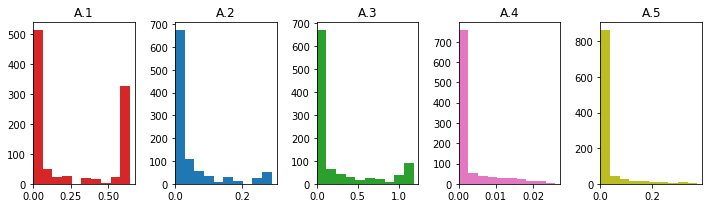

This is timestep 1


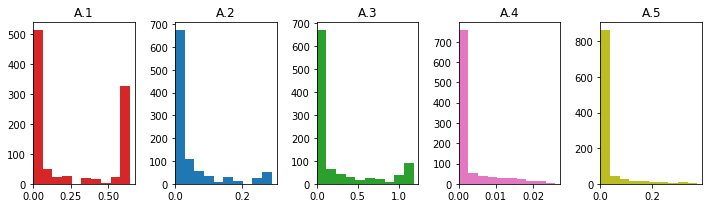

This is timestep 2


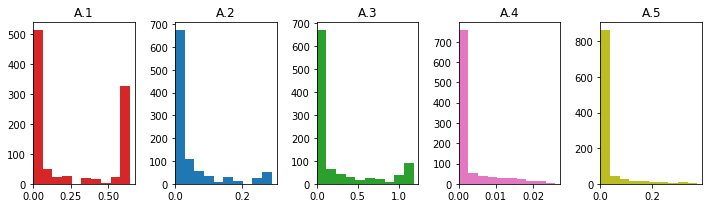

In [46]:
histogram_maker(results_df,"Expected Number of Deaths")

Plot Expected Annual Damage(Histogram)
This is timestep 0


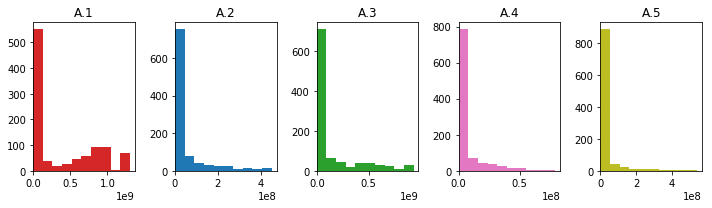

This is timestep 1


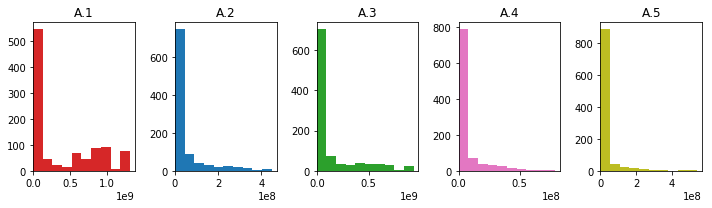

This is timestep 2


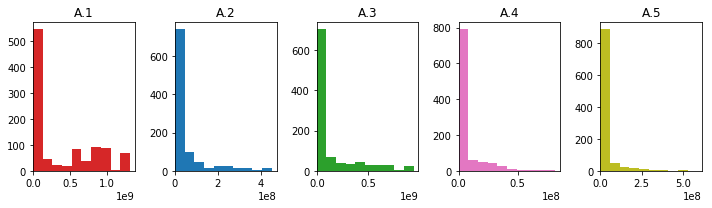

In [47]:
histogram_maker(results_df,"Expected Annual Damage")

# 3. Open Policy exploration

In [4]:
# Exploration of alternative policy ideas:

policy_g_dikes = Policy("Gelderland_Dikes",  
                    **{'0_RfR 0': 0, '0_RfR 1' : 0, '0_RfR 2' : 0,
                    '1_RfR 0': 0, '1_RfR 1' : 0, '1_RfR 2' : 0,
                    '2_RfR 0': 0, '2_RfR 1' : 0, '2_RfR 2' : 0,
                    '3_RfR 0': 0, '3_RfR 1' : 0, '3_RfR 2' : 0,
                    '4_RfR 0': 0, '4_RfR 1' : 0, '4_RfR 2' : 0,
                    'A.1_DikeIncrease 0' : 10, 'A.1_DikeIncrease 1' : 0, 'A.1_DikeIncrease 2' : 0,
                    'A.2_DikeIncrease 0' : 10, 'A.2_DikeIncrease 1' : 0, 'A.2_DikeIncrease 2' : 0,
                    'A.3_DikeIncrease 0' : 10, 'A.3_DikeIncrease 1' : 0, 'A.3_DikeIncrease 2' : 0,
                    'A.4_DikeIncrease 0' : 0, 'A.4_DikeIncrease 1' : 0, 'A.4_DikeIncrease 2' : 0,
                    'A.5_DikeIncrease 0' : 0, 'A.5_DikeIncrease 1' : 0, 'A.5_DikeIncrease 2' : 0,
                    'EWS_DaysToThreat':  0   })

policy_all_dikes = Policy("All_dikes",  
                    **{'0_RfR 0': 0, '0_RfR 1' : 0, '0_RfR 2' : 0,
                    '1_RfR 0': 0, '1_RfR 1' : 0, '1_RfR 2' : 0,
                    '2_RfR 0': 0, '2_RfR 1' : 0, '2_RfR 2' : 0,
                    '3_RfR 0': 0, '3_RfR 1' : 0, '3_RfR 2' : 0,
                    '4_RfR 0': 0, '4_RfR 1' : 0, '4_RfR 2' : 0,
                    'A.1_DikeIncrease 0' : 10, 'A.1_DikeIncrease 1' : 0, 'A.1_DikeIncrease 2' : 0,
                    'A.2_DikeIncrease 0' : 10, 'A.2_DikeIncrease 1' : 0, 'A.2_DikeIncrease 2' : 0,
                    'A.3_DikeIncrease 0' : 10, 'A.3_DikeIncrease 1' : 0, 'A.3_DikeIncrease 2' : 0,
                    'A.4_DikeIncrease 0' : 10, 'A.4_DikeIncrease 1' : 0, 'A.4_DikeIncrease 2' : 0,
                    'A.5_DikeIncrease 0' : 10, 'A.5_DikeIncrease 1' : 0, 'A.5_DikeIncrease 2' : 0,
                    'EWS_DaysToThreat':  0   })

policy_everything = Policy("Everything",  
                    **{'0_RfR 0': 1, '0_RfR 1' : 0, '0_RfR 2' : 0,
                    '1_RfR 0': 1, '1_RfR 1' : 0, '1_RfR 2' : 0,
                    '2_RfR 0': 1, '2_RfR 1' : 0, '2_RfR 2' : 0,
                    '3_RfR 0': 1, '3_RfR 1' : 0, '3_RfR 2' : 0,
                    '4_RfR 0': 1, '4_RfR 1' : 0, '4_RfR 2' : 0,
                    'A.1_DikeIncrease 0' : 10, 'A.1_DikeIncrease 1' : 0, 'A.1_DikeIncrease 2' : 0,
                    'A.2_DikeIncrease 0' : 10, 'A.2_DikeIncrease 1' : 0, 'A.2_DikeIncrease 2' : 0,
                    'A.3_DikeIncrease 0' : 10, 'A.3_DikeIncrease 1' : 0, 'A.3_DikeIncrease 2' : 0,
                    'A.4_DikeIncrease 0' : 10, 'A.4_DikeIncrease 1' : 0, 'A.4_DikeIncrease 2' : 0,
                    'A.5_DikeIncrease 0' : 10, 'A.5_DikeIncrease 1' : 0, 'A.5_DikeIncrease 2' : 0,
                    'EWS_DaysToThreat':  4   })

n_policies = 4

In [ ]:
ema_logging.log_to_stderr(ema_logging.INFO)
 
with MultiprocessingEvaluator(dike_model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=50, policies=policy_noaction)

In [5]:
n_scenarios = 5000

ema_logging.log_to_stderr(ema_logging.INFO)

# Model Imports
from dike_model_function import DikeNetwork
from problem_formulation import get_model_for_problem_formulation

dike_model, time_step = get_model_for_problem_formulation(8)
 
with MultiprocessingEvaluator(dike_model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=n_scenarios, policies=[policy_noaction,policy_g_dikes,policy_all_dikes,policy_everything])

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 5000 scenarios * 4 policies * 1 model(s) = 20000 experiments
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] 4000 cases completed
[MainProcess/INFO] 6000 cases completed
[MainProcess/INFO] 8000 cases completed
[MainProcess/INFO] 10000 cases completed
[MainProcess/INFO] 12000 cases completed
[MainProcess/INFO] 14000 cases completed
[MainProcess/INFO] 16000 cases completed
[MainProcess/INFO] 18000 cases completed
[MainProcess/INFO] 20000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [6]:
save_results([experiments,outcomes],'../results/OpenExp_5000Scenarios_FourPolicies_PF8')

[MainProcess/INFO] results saved successfully to C:\Users\Timme\Desktop\EPA\model-based-decision-making\results\OpenExp_5000Scenarios_FourPolicies_PF8


# 4. Analyse results statistically

In [7]:
n_scenarios = len(experiments)/n_policies

In [8]:
# Outcomes, all policies
pd.DataFrame(outcomes).describe()

,Gelderland Expected Annual Damage,Overijssel Expected Annual Damage,Expected Number of Deaths,Gelderland Dike Cost,Overijssel Dike Cost,Room for River Investment Costs,Evacuation Costs
count,2.000000e+04,2.000000e+04,20000.000000,2.000000e+04,2.000000e+04,2.000000e+04,20000.000000
mean,4.167802e+08,7.718699e+07,0.464930,9.466399e+08,1.454416e+08,1.776000e+08,6.823491
std,9.667891e+08,1.907833e+08,0.937954,5.481381e+08,1.454452e+08,3.076199e+08,224.599725
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,0.000000e+00,0.000000e+00,0.000000,8.956791e+08,0.000000e+00,0.000000e+00,0.000000
50%,0.000000e+00,0.000000e+00,0.009339,1.245200e+09,1.454416e+08,0.000000e+00,0.000000
75%,4.343737e+07,6.364946e+07,0.356690,1.296160e+09,2.908831e+08,1.776000e+08,0.000000
max,6.656833e+09,1.624072e+09,5.733598,1.296160e+09,2.908831e+08,7.104000e+08,24733.901940


In [9]:
# Do NOTHING Policy
pd.DataFrame(outcomes).iloc[:int(n_scenarios),:].describe()

,Gelderland Expected Annual Damage,Overijssel Expected Annual Damage,Expected Number of Deaths,Gelderland Dike Cost,Overijssel Dike Cost,Room for River Investment Costs,Evacuation Costs
count,5.000000e+03,5.000000e+03,5000.000000,5000.0,5000.0,5000.0,5000.0
mean,1.664993e+09,8.156381e+07,1.669594,0.0,0.0,0.0,0.0
std,1.288787e+09,1.959178e+08,1.225916,0.0,0.0,0.0,0.0
min,8.158376e+06,0.000000e+00,0.029400,0.0,0.0,0.0,0.0
25%,4.088868e+08,0.000000e+00,0.598956,0.0,0.0,0.0,0.0
50%,1.551638e+09,4.281571e+05,1.831360,0.0,0.0,0.0,0.0
75%,2.713616e+09,6.554702e+07,2.161018,0.0,0.0,0.0,0.0
max,6.656833e+09,1.512980e+09,5.733598,0.0,0.0,0.0,0.0


In [10]:
# Do EVERYTHING Policy
pd.DataFrame(outcomes).iloc[int(n_scenarios*(n_policies-1)):int(n_scenarios*n_policies),:].describe()

,Gelderland Expected Annual Damage,Overijssel Expected Annual Damage,Expected Number of Deaths,Gelderland Dike Cost,Overijssel Dike Cost,Room for River Investment Costs,Evacuation Costs
count,5.000000e+03,5.000000e+03,5000.000000,5.000000e+03,5000.0,5000.0,5000.000000
mean,1.851709e+05,1.932789e+05,0.000054,1.296160e+09,290883138.0,710400000.0,27.293964
std,3.441980e+06,4.308503e+06,0.000760,0.000000e+00,0.0,0.0,448.610730
min,0.000000e+00,0.000000e+00,0.000000,1.296160e+09,290883138.0,710400000.0,0.000000
25%,0.000000e+00,0.000000e+00,0.000000,1.296160e+09,290883138.0,710400000.0,0.000000
50%,0.000000e+00,0.000000e+00,0.000000,1.296160e+09,290883138.0,710400000.0,0.000000
75%,0.000000e+00,0.000000e+00,0.000000,1.296160e+09,290883138.0,710400000.0,0.000000
max,1.893037e+08,2.705528e+08,0.034108,1.296160e+09,290883138.0,710400000.0,24733.901940


# 5. Analyse policies visually

In [19]:
#experiments, outcomes = results
n_policies = 4
n_scenarios = len(experiments)/n_policies

policies = np.empty([len(experiments),1])
k = 0
l = n_scenarios
for i in range(len(experiments)):
    policies[i] = k
    if (i == l - 1):
        k = k + 1
        l = l + n_scenarios
policies = policies.astype(int)

data = pd.DataFrame.from_dict(outcomes)
data['policy']=policies

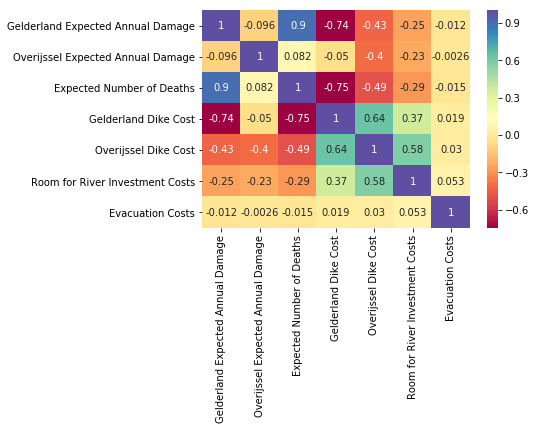

In [12]:
sns.heatmap(pd.DataFrame(outcomes).corr(), annot=True, cmap = "Spectral")

Pairgrid

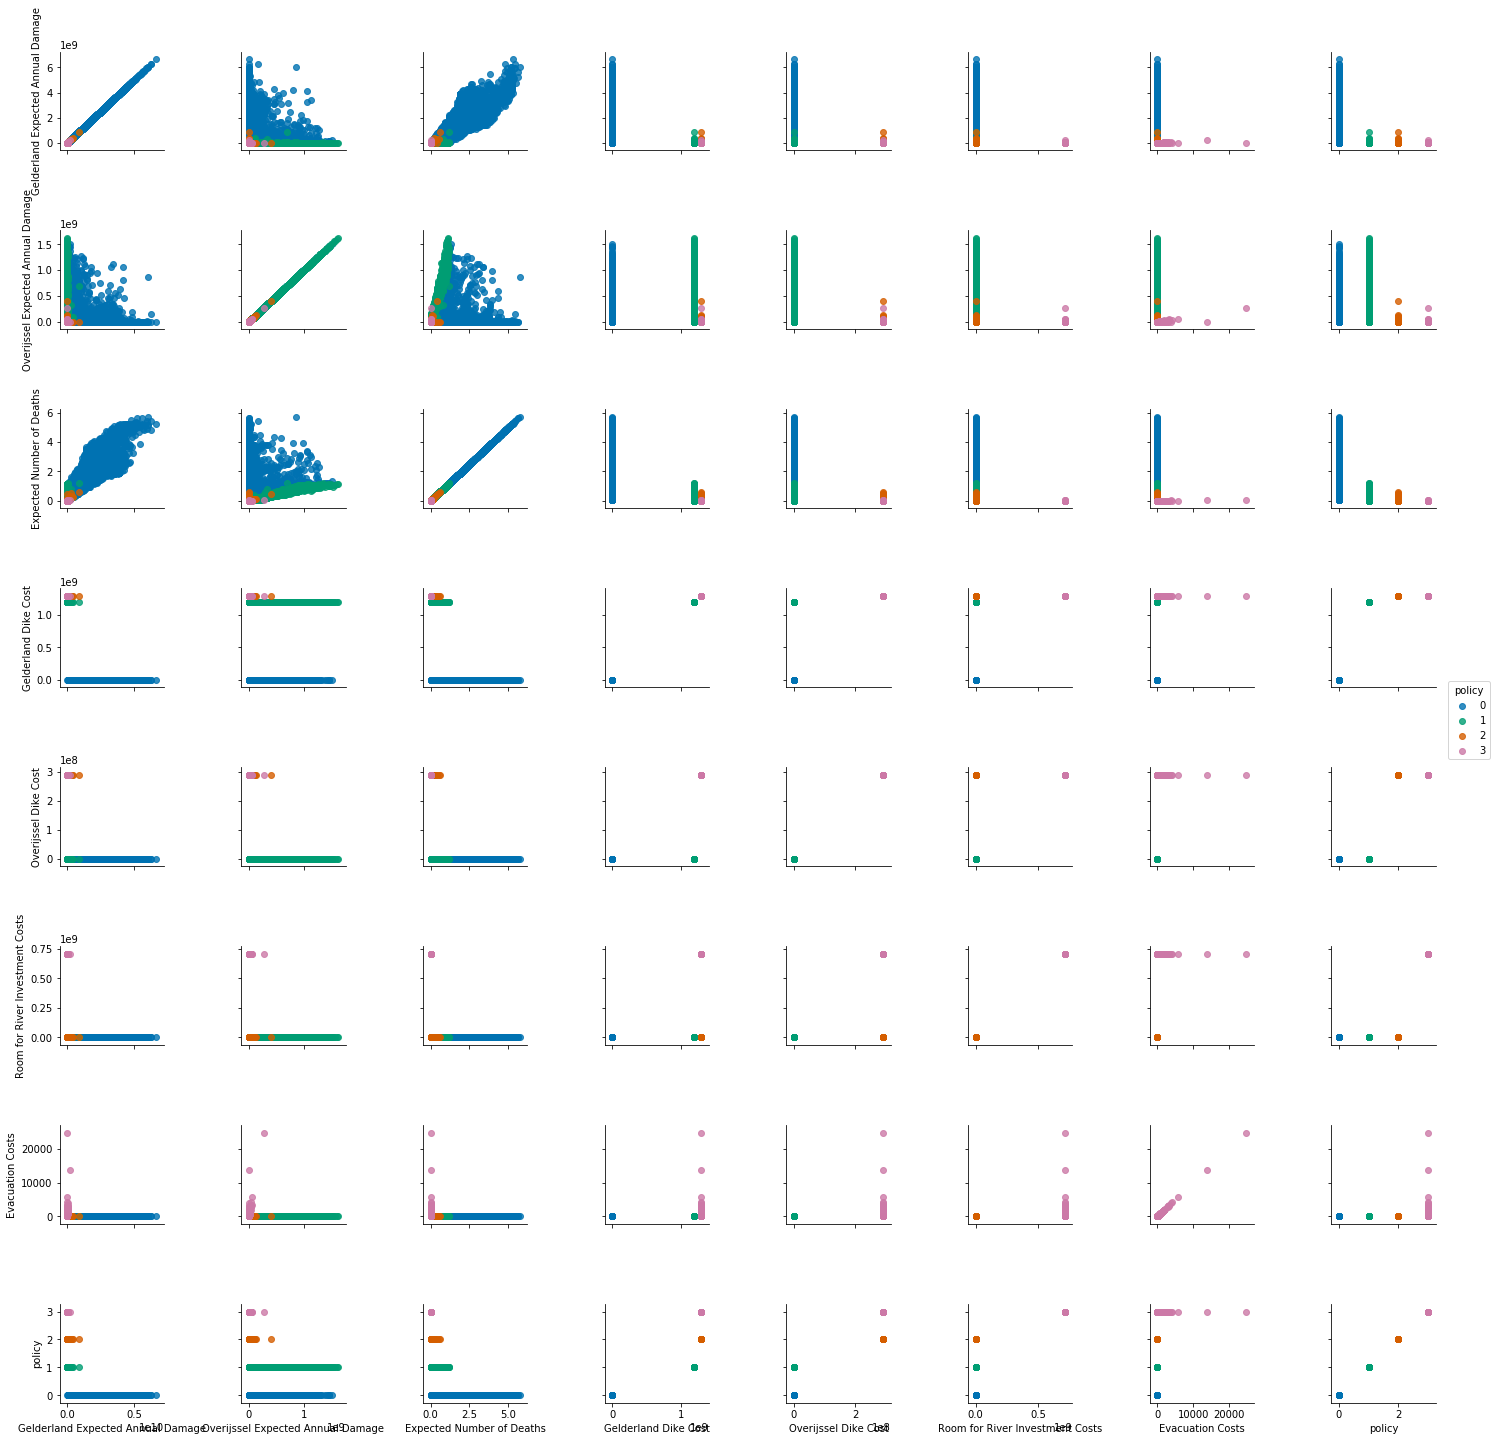

In [13]:
g = sns.PairGrid(data, hue = 'policy', palette = 'colorblind')
g.map(plt.scatter, alpha = 0.8)
g.add_legend()

In [20]:
data.loc[:5000,'policy'] = 'Do Nothing'
data.loc[5000:10000,'policy'] = 'Selfish'
data.loc[10000:15000,'policy'] = 'Something'
data.loc[15000:20000,'policy'] = 'Do Everything'

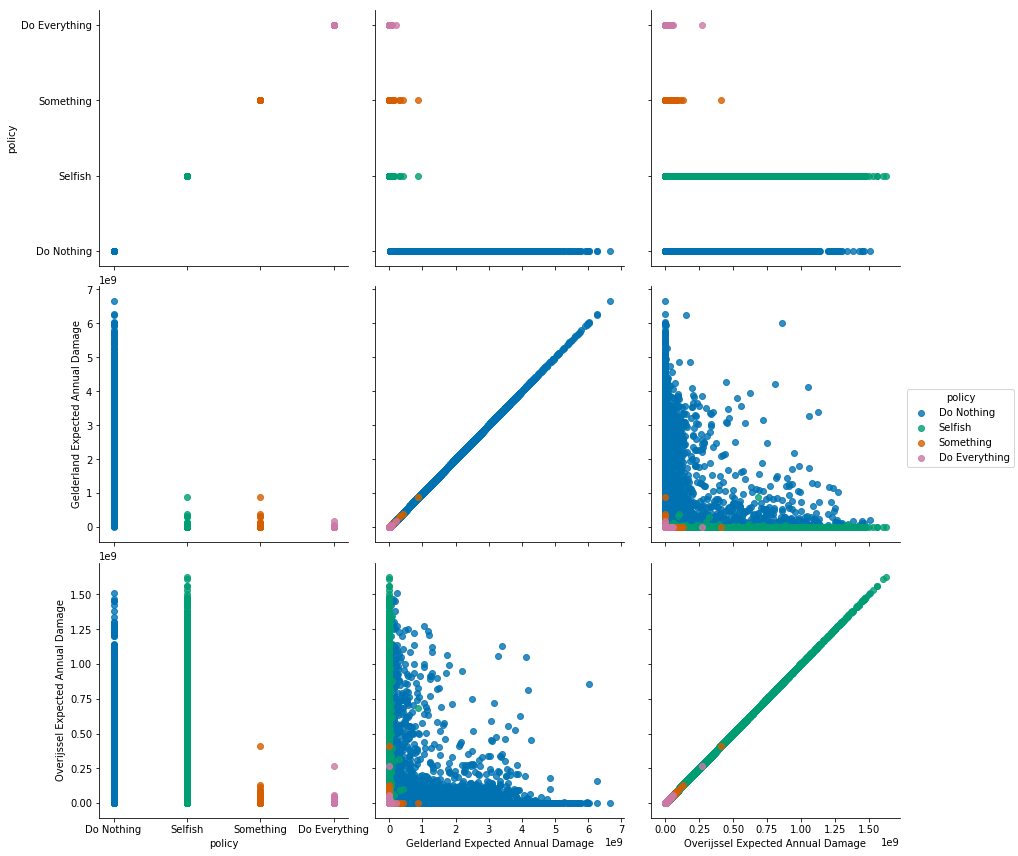

In [21]:
g = sns.PairGrid(data, hue = 'policy', palette = 'colorblind', vars = ['policy','Gelderland Expected Annual Damage','Overijssel Expected Annual Damage'], size = 4)
g.map(plt.scatter, alpha = 0.8)
g.add_legend()

In [22]:
#Tsplot

n_policies = 4
n_scenarios = len(experiments)/n_policies

policies = np.empty([len(experiments),1])
k = 0
l = n_scenarios
for i in range(len(experiments)):
    policies[i] = k
    if(i == l - 1):
        k = k+1
        l = l + n_scenarios
policies = policies.astype(int)

data = pd.DataFrame.from_dict(outcomes)
data['policy'] = policies

C:\Users\Timme\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
C:\Users\Timme\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
C:\Users\Timme\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
C:\Users\Timme\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


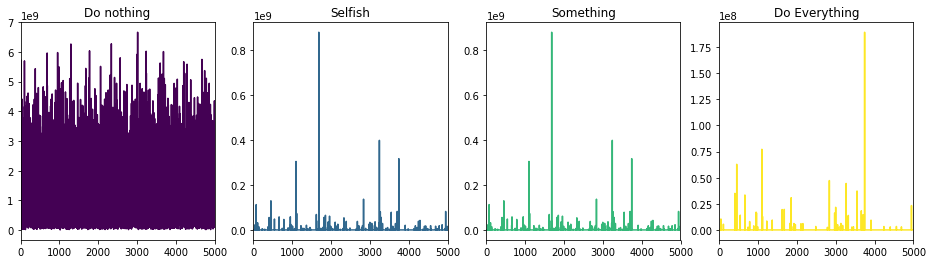

In [23]:
from matplotlib.pyplot import cm


fig, axs = plt.subplots(figsize=[16,4],ncols = 4)
colors = iter(cm.viridis(np.linspace(0,1,4)))
l = ['Do nothing','Selfish','Something','Do Everything']
for i in range(0,n_policies):
    sns.tsplot(data=data[data.policy == int(i)]['Gelderland Expected Annual Damage'].reset_index(drop=True),
              ax=axs[i],legend=True, color = next(colors)).set_title(l[i])

C:\Users\Timme\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
C:\Users\Timme\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
C:\Users\Timme\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
C:\Users\Timme\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


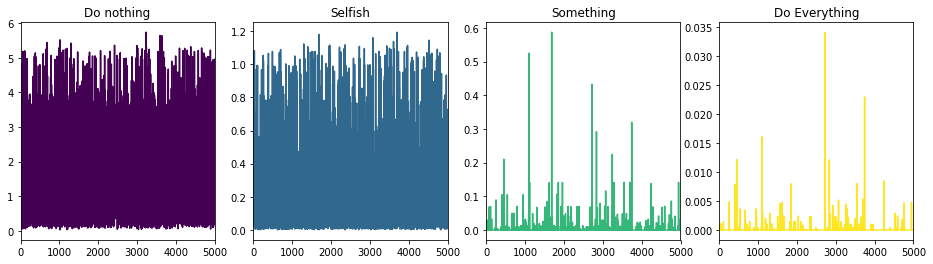

In [18]:
from matplotlib.pyplot import cm


fig, axs = plt.subplots(figsize=[16,4],ncols = 4)
colors = iter(cm.viridis(np.linspace(0,1,4)))
l = ['Do nothing','Selfish','Something','Do Everything']
for i in range(0,n_policies):
    sns.tsplot(data=data[data.policy == int(i)]['Expected Number of Deaths'].reset_index(drop=True),
              ax=axs[i],legend=True, color = next(colors)).set_title(l[i])

In [3]:
experiments, outcomes = load_results("../results/500Scenarios_NoAction_PF1.tar.gz")

[MainProcess/INFO] results loaded succesfully from C:\Users\Samuel\Desktop\Studies\EPA\EPA1361 - Model Based Decision Making\model-based-decision-making\results\500Scenarios_NoAction_PF1.tar.gz


In [6]:
outcomes_df = pd.DataFrame(data=outcomes)

In [7]:
outcomes_df.describe()

,Gelderland Expected Annual Damage,Overijssel Expected Annual Damage,Expected Number of Deaths,Gelderland Dike Cost,Overijssel Dike Cost,Room for River Investment Costs,Evacuation Costs
count,5.000000e+01,5.000000e+01,50.000000,50.0,50.0,50.0,50.0
mean,1.662342e+09,1.043691e+08,1.653274,0.0,0.0,0.0,0.0
std,1.374610e+09,2.627755e+08,1.196482,0.0,0.0,0.0,0.0
min,5.611943e+07,0.000000e+00,0.172231,0.0,0.0,0.0,0.0
25%,3.192079e+08,0.000000e+00,0.702819,0.0,0.0,0.0,0.0
50%,1.632495e+09,0.000000e+00,1.823602,0.0,0.0,0.0,0.0
75%,2.560095e+09,6.384873e+07,2.036184,0.0,0.0,0.0,0.0
max,5.565810e+09,1.307173e+09,4.850377,0.0,0.0,0.0,0.0


In [8]:
results_df = pd.concat([experiments,outcomes_df], axis = 1)

In [9]:
results_df

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,scenario,policy,model,Gelderland Expected Annual Damage,Overijssel Expected Annual Damage,Expected Number of Deaths,Gelderland Dike Cost,Overijssel Dike Cost,Room for River Investment Costs,Evacuation Costs
0,13.0,211.961268,1,0.210232,87.955951,1,0.529523,137.998064,1.5,0.279880,...,0,NoAction,dikesnet,2.722075e+09,0.000000e+00,1.886147,0,0,0.0,0.0
1,70.0,74.244570,1,0.682204,334.232896,1.5,0.571898,100.501240,10,0.214582,...,1,NoAction,dikesnet,1.561471e+09,0.000000e+00,2.662413,0,0,0.0,0.0
2,21.0,304.985434,1,0.713624,141.884175,1.5,0.996785,269.617703,1.5,0.079201,...,2,NoAction,dikesnet,1.563618e+09,0.000000e+00,3.371354,0,0,0.0,0.0
3,101.0,268.687199,1.5,0.486573,171.058162,1,0.034449,159.473975,1,0.124595,...,3,NoAction,dikesnet,2.328048e+09,0.000000e+00,2.524756,0,0,0.0,0.0
4,60.0,179.868753,1.5,0.157237,65.122330,10,0.171818,86.224651,1,0.032849,...,4,NoAction,dikesnet,5.565810e+09,0.000000e+00,4.525081,0,0,0.0,0.0
5,131.0,310.499324,10,0.589669,84.700759,1,0.976706,347.306824,1.5,0.654233,...,5,NoAction,dikesnet,1.371397e+08,6.480974e+07,0.284038,0,0,0.0,0.0
6,46.0,245.341676,1.5,0.117697,57.430401,1,0.789565,78.006015,10,0.388840,...,6,NoAction,dikesnet,3.482980e+09,0.000000e+00,1.849947,0,0,0.0,0.0
7,2.0,100.167862,1.5,0.666797,183.271890,10,0.108860,157.785704,1.5,0.976774,...,7,NoAction,dikesnet,7.327147e+08,4.729578e+07,0.688463,0,0,0.0,0.0
8,53.0,101.367670,1,0.568590,217.821284,10,0.556425,44.818527,10,0.345856,...,8,NoAction,dikesnet,5.627210e+08,1.052201e+08,1.172746,0,0,0.0,0.0
9,83.0,32.260766,1,0.419368,317.666604,1,0.869385,309.863827,10,0.539326,...,9,NoAction,dikesnet,9.005376e+08,1.578210e+08,0.819811,0,0,0.0,0.0


In [14]:
def aggregate_outcomes(results, outcome):
    '''
    This function creates a new column in the given dataframe with the aggregated scores. It does it inplace. 
    Parameters
    ----------
    results : dataframe 
    outcome : str
    '''

    list_outcomes_columns = []

    for i in results.columns:
        if outcome in i:
            list_outcomes_columns.append(i)

    results["Total " + str(outcome)
            ] = results[list_outcomes_columns].sum(axis=1)

In [54]:
# Create an aggregate score of the outcomes over location and time, some visualizations only work on the total score.

aggregate_outcomes(results_df, "Expected Annual Damage")
aggregate_outcomes(results_df, "Expected Number of Deaths")

# 2. Data Visualization of the base case

### Preprocess of results

In [10]:
n_policies = 1
n_scenarios = len(experiments) / n_policies

policies = np.empty([len(experiments), 1])
k = 0
l = n_scenarios
for i in range (len(experiments)) : 
    policies[i] = k
    if (i == l - 1) : 
        k = k + 1
        l = l + n_scenarios
policies = policies.astype(int)

data = pd.DataFrame.from_dict(outcomes)
data['policy'] = policies

#### Heatmap

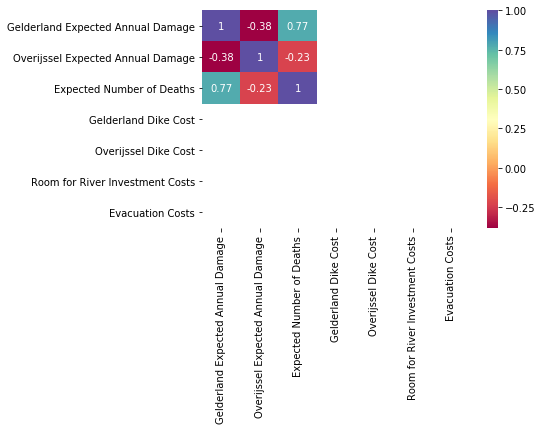

In [11]:

# Make an initial heatmap to see which outcomes should be put into the PairGrids
sns.heatmap(pd.DataFrame(outcomes).corr(),annot=True, cmap= "Spectral")

In [12]:
pd.DataFrame(outcomes)

,Gelderland Expected Annual Damage,Overijssel Expected Annual Damage,Expected Number of Deaths,Gelderland Dike Cost,Overijssel Dike Cost,Room for River Investment Costs,Evacuation Costs
0,2.722075e+09,0.000000e+00,1.886147,0,0,0.0,0.0
1,1.561471e+09,0.000000e+00,2.662413,0,0,0.0,0.0
2,1.563618e+09,0.000000e+00,3.371354,0,0,0.0,0.0
3,2.328048e+09,0.000000e+00,2.524756,0,0,0.0,0.0
4,5.565810e+09,0.000000e+00,4.525081,0,0,0.0,0.0
5,1.371397e+08,6.480974e+07,0.284038,0,0,0.0,0.0
6,3.482980e+09,0.000000e+00,1.849947,0,0,0.0,0.0
7,7.327147e+08,4.729578e+07,0.688463,0,0,0.0,0.0
8,5.627210e+08,1.052201e+08,1.172746,0,0,0.0,0.0
9,9.005376e+08,1.578210e+08,0.819811,0,0,0.0,0.0


It is practical to create visualizations of the outcomes of experiments to better understand the workings of  the model and gain insights

## 2.1 Histogram Plots

Text here

## 2.1.1 Expected Number of Deaths

In [31]:
def histogram_maker(results, outcome, n=3):
    '''
    This function creates multiple histograms across time and location. 
    Parameters
    ----------
    results : dataframe 
    outcome : str
    n : int (time steps)
    '''

    locations = ["A.1", "A.2", "A.3", "A.4", "A.5"]
    colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:olive']

    print("Plot " + str(outcome) + "(Histogram)")
    for step in range(0, n):
        print("This is timestep " + str(step))
        fig, axes = plt.subplots(1, 5, figsize=(10, 3))

        for i, (ax, place) in enumerate(zip(axes.flatten(), locations)):
            #ax.hist(results[str(place) + "_Expected Annual Damage " + str(step)], color=colors[i])
            ax.hist(results[str(place) + "_" + str(outcome) +
                            " " + str(step)], color=colors[i])
            ax.set_xlim(left=0)
            ax.set_title(place)

        plt.tight_layout()
        plt.show()
        
histogram_maker(results_df,"Expected Number of Deaths")

Plot Expected Number of Deaths(Histogram)
This is timestep 0


KeyError: 'A.1_Expected Annual Damage 0'

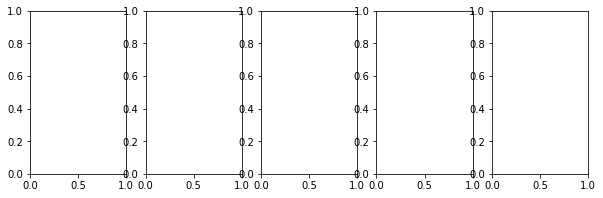

In [57]:
histogram_maker(results_df,"Expected Number of Deaths")

In [6]:
from visualization_functions import (histogram_maker, mean_outcomes, aggregate_outcomes,
                                     scatter_maker, pairplot_maker, boxplot_histogram_maker, boxplot_maker)

ModuleNotFoundError: No module named 'visualization_functions'

In [48]:
def mean_outcomes(results, outcomes):
    '''
    This function makes the mean 
    Parameters
    ----------
    results : dataframe 
    outcomes : list
    '''


#     # Get the mean for all the results across the scenarios to have a quick look at significant locations
    mean_outcomes_df = results.iloc[:, 52:].apply(np.mean, axis=0)

    locations = ["A.1", "A.2", "A.3", "A.4", "A.5"]
    outcomes = outcomes
    x = [0, 1, 2]

    # For the base case it is only necessary to have two plots but if you want to add the costs more plots will be added
    # max 6 outcomes.
    if len(outcomes) == 2:
        fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(8, 8), sharex=True)
        axes = axes.flatten()
    else:
        fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(8, 8), sharex=True)
        axes = axes.flatten()

    # These criteria are not specific to a location
    special_criteria = ["Expected Evacuation Costs", "RfR Total Costs"]

    for ax, criteria in zip(axes, outcomes):
        for step in x:
            for place in locations:
                if criteria == "RfR Total Costs":
                    ax.plot(step, mean_outcomes_df[[
                            str(criteria) + " " + str(step)]].values[0], 'ro', c='y')
                elif criteria == "Expected Evacuation Costs":
                    ax.plot(step, mean_outcomes_df[[
                            str(criteria) + " " + str(step)]].values[0], 'ro', c='y')
                else:
                    if place == "A.1":
                        ax.plot(step, mean_outcomes_df[[str(place) + "_" + str(criteria) + " " + str(step)]].values[0],
                                'ro', c="b", label="A.1")
                    elif place == "A.2":
                        ax.plot(step, mean_outcomes_df[[str(place) + "_" + str(criteria) + " " + str(step)]].values[0],
                                'ro', c="r", label="A.2")
                    elif place == "A.3":
                        ax.plot(step, mean_outcomes_df[[str(place) + "_" + str(criteria) + " " + str(step)]].values[0],
                                'ro', c="g", label="A.3")
                    elif place == "A.4":
                        ax.plot(step, mean_outcomes_df[[str(place) + "_" + str(criteria) + " " + str(step)]].values[0],
                                'ro', c="m", label="A.4")
                    elif place == "A.5":
                        ax.plot(step, mean_outcomes_df[[str(place) + "_" + str(criteria) + " " + str(step)]].values[0],
                                'ro', c="c", label="A.5")

        ax.set_xlabel("Time Steps")
        ax.set_ylabel(criteria)
        ax.set_title(str(criteria) + "\nOver the Five Locations", y=1.1)
        legend_without_duplicate_labels(ax)

    plt.tight_layout()
    plt.show()

In [52]:
# Select the outcomes you want the mean, for base case the costs are not very interesting.
# outcome_names = ["Expected Annual Damage", "Expected Number of Deaths", "Expected Evacuation Costs", "RfR Total Costs",
#                 "Dike Investment Costs"]

outcome_names = ["Expected Annual Damage", "Expected Number of Deaths"]

mean_outcomes(results, outcome_names)


NameError: name 'results' is not defined

In [36]:
def pairplot_maker(results, location, n=3):
    '''
    Creates a pairplot maker with only the location and timestep columns.
    Parameters
    ----------
    results : dataframe 
    location : str
    timestep : int
    '''
    list_loc = []
    list_loc_n = []
    n = n-1

    for i in results.columns:
        if location in i:
            list_loc.append(i)
        elif "RfR Total Cost" in i:
            list_loc.append(i)
        elif "Expected Evacuation Costs" in i:
            list_loc.append(i)

    for i in list_loc:
        if str(n) in i:
            list_loc_n.append(i)
        elif "Bmax" in i:
            list_loc_n.append(i)
        elif "Brate" in i:
            list_loc_n.append(i)
        elif "pfail" in i:
            list_loc_n.append(i)

    list_loc_n.append("policy")
    sns.pairplot(results[list_loc_n], hue='policy',
                 vars=results[list_loc_n].iloc[:, :-1].keys())
    plt.tight_layout()
    plt.show()

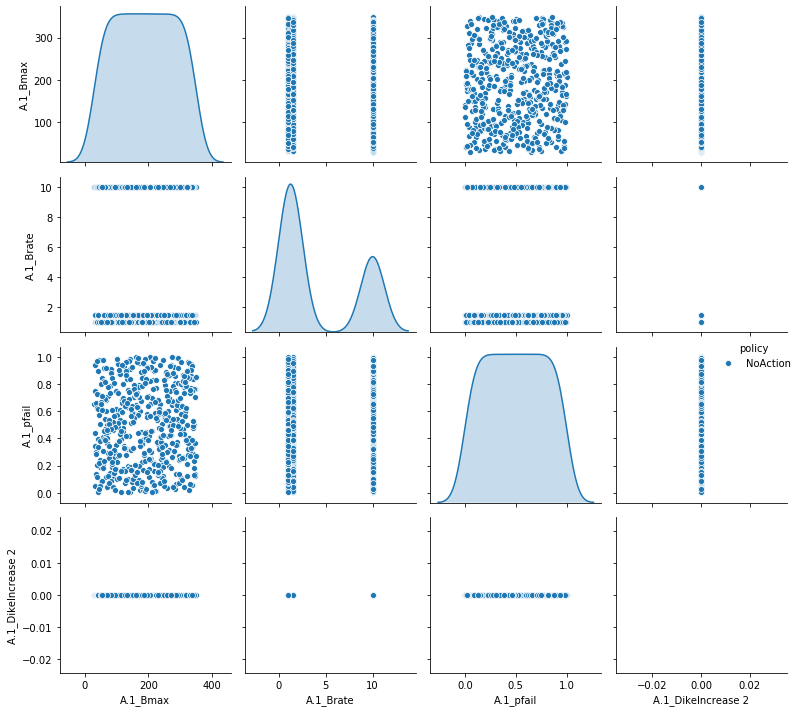

<function __main__.pairplot_maker(results, location, n=3)>

In [40]:
# Takes more time to load than other visualizations
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
interact(pairplot_maker, results=fixed(results_df),
         n=[1, 2, 3], location=["A.1", "A.2", "A.3", "A.4", "A.5"])